# Proposal

### Aim: 

Indicating how COVID-19 spread worldwidely, which continent/country is the most severe and in addition, to analyze how COVID-19 spreads in US, CA and China. Finally, conduct a time series analysis on the COVID-19 cases in certain countries (US, CA and China) based on the confirmed cases.

### Objectives:

### Primary Objectives:

- To figure out the country with the most confirmed and recovered cases worldwidely.

- To figure out the Province/State with the most confirmed number in US.

- To find if there are any factors that relate to the incidence rate of COVID-19, retrieve results from different countries.

- To determine the trend of COVID-19 in the future.

### Secondary Objectives:

- To compare the recovery rate and active cases remain of the top 3 countries with most confirmed cases.

- To provide basis for future study

### Steps involved our analysis:

Step 1. Data loading and cleaning

Step 2. Comparison between countries worldwidely

- Use color-code to highlight countries with large amount of confirmed cases worldwidely

- Highlight states in US with scale to indicate how COVID spreads.

Step 3. Prediction of COVID

- Use bar graphs to show COVID confirmed cases up to Aug 24, 2021 in Canada and China.

- Predict the future trends based on our model.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-01-2021.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/08-01-2021.csv')

In [3]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,152411,152448,152448,152448,152583,152660,152722,152822,152960,152960
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,137597,138132,138790,139324,139721,140521,141365,142253,143174,144079
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,190078,190656,191171,191583,192089,192626,193171,193674,194186,194671
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,14981,14988,14988,14988,15002,15003,15014,15016,15025,15025
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,45325,45583,45817,45945,46076,46340,46539,46726,46929,47079


In [4]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7047,7054,7054,7054,7076,7083,7090,7093,7101,7101
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2473,2475,2477,2478,2478,2480,2483,2486,2487,2490
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,4929,4957,4984,5004,5034,5063,5096,5121,5148,5179
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,129,129,129,129,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1133,1138,1140,1153,1163,1166,1176,1182,1186,1192


In [5]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/19/21,8/20/21,8/21/21,8/22/21,8/23/21,8/24/21,8/25/21,8/26/21,8/27/21,8/28/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-08-02 04:21:36,33.93911,67.709953,146523,6677,82586.0,57260.0,Afghanistan,376.391586,4.556964
1,NaN,NaN,NaN,Albania,2021-08-02 04:21:36,41.15330,20.168300,133121,2457,130243.0,421.0,Albania,4625.790534,1.845689
2,NaN,NaN,NaN,Algeria,2021-08-02 04:21:36,28.03390,1.659600,172564,4291,116009.0,52264.0,Algeria,393.523137,2.486614
3,NaN,NaN,NaN,Andorra,2021-08-02 04:21:36,42.50630,1.521800,14678,128,14210.0,340.0,Andorra,18996.958519,0.872053
4,NaN,NaN,NaN,Angola,2021-08-02 04:21:36,-11.20270,17.873900,42815,1016,37397.0,4402.0,Angola,130.270343,2.373000


In [7]:
us_medical_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2021-08-02 04:30:45,32.3182,-86.9023,587405,11536,NaN,NaN,1.0,11980.070097,2756534.0,NaN,1.963892,84000001.0,USA,56219.253404,NaN
1,Alaska,US,2021-08-02 04:30:45,61.3707,-152.4044,75486,389,NaN,NaN,2.0,10318.709034,2496001.0,NaN,0.515327,84000002.0,USA,341195.825274,NaN
2,American Samoa,US,2021-08-02 04:30:45,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,2140.0,NaN,NaN,16.0,ASM,3846.084722,NaN
3,Arizona,US,2021-08-02 04:30:45,33.7298,-111.4312,929541,18251,NaN,NaN,4.0,12770.670985,10737481.0,NaN,1.963442,84000004.0,USA,147518.869053,NaN
4,Arkansas,US,2021-08-02 04:30:45,34.9697,-92.3731,388436,6157,NaN,NaN,5.0,12871.478731,3318720.0,NaN,1.585075,84000005.0,USA,109971.356655,NaN


### COVID-19 spread - worldwidely and in US

In [26]:
import plotly.express as px

fig = px.choropleth(confirmed_df, locations = 'Country/Region', locationmode = 'country names', color = '8/24/21')
fig.update_layout(title_text = 'COVID-19 Global Confirmed Cases')
fig.show()

From the above graph of daily confirmed cases worldwidely, we can see that US is the country with most confirmed cases as of Aug 24, 2021. As the amount of confirmed COVID-19 cases are shown as the scale on the right, we can also say that  COVID-19 is spreading severrly in both Brazil and India. In the next part, we will mainly focus in US, how it got the most confirmed cases, in Canada, as it is where I currently live, in China, how it controls COVID from spreading.

In [9]:
us_medical_data['abbrev'] = us_medical_data.Province_State.replace(us_state_abbrev)

In [10]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

def US_COVID(topic):
    data = dict(type = 'choropleth',
            locations = us_medical_data['abbrev'],
            locationmode = 'USA-states',
            colorscale = 'Reds',
            text = 'COVID',
            z = us_medical_data[topic],
            colorbar = {'title': topic + ' number'})
    layout = dict(title = 'USA COVID' + topic, geo = dict(scope='usa'))
    choromap = go.Figure(data = [data], layout = layout)
    iplot(choromap)
    


In [11]:
US_COVID('Confirmed')

As the darker the red is, the severer the issue might be in that state, we can conclue that California is the state with most confirmed COVID-19 cases currently in US. As California has the most population in US, we need to combine it with Texas, which is the state with the 2nd most population and Florida, which is the 3rd, to get results. From the country map, we can see that these three states follow the proporty that the more people they got, the higher the confirmed number. As we also want to figure out if development level might affect COVID incident rate, we will take a look at the map of fatality rate in US.

In [12]:
US_COVID('Case_Fatality_Ratio')

From the fatality rate map, we can conclude that states with the highest fatality ratio are around New Jersey, Miami and New York. As all these three states stack together, we might conclue that here is the most severe COVID spreading area in US. Also, as New York is one of the most developed states in US and it still has a relatively high fatality ratio, we can say that we still haven't found an efficient cure to COVID but prevent it from happening. 

### COVID-19 trends in Canada and China

#### In Canada

In [13]:
def bar_analysis(country):
    confirmed = confirmed_df[confirmed_df['Country/Region'] == country]
    confirmed.reset_index()
    dates = confirmed.columns[4:]
    province = confirmed['Province/State']
    fig = go.Figure(data=[go.Bar(name = province[list(confirmed.index)[i]], x=dates, y=list(confirmed.iloc[i,4:])) for i in range(len(confirmed))])
    fig.update_layout(barmode='stack',title_text='Time Series Confirmed Cases across ' + country)
    iplot(fig)

In [14]:
bar_analysis('Canada')

From the bar graph, we can conclude that Ontario is currently the province with most confirmed COVID cases and the other two top provinces are Quebec and ALberta. Although confirmed cases not increase rapidly in Canada, it also never stop as we see that confirmed cases keep increasing day after day. From the trends of data from these provinces, we may predict that confirmed cases may keep increasing in the future as we can't see any declining trend from the graph. To consolidate our opinion, we will make a futrue prediction based on ... model in the next part.

#### In China

In [15]:
bar_analysis('China')

We can see there was a burst increasing in the amount of confirmed cases from Feb 13, 2020. Hubei was the province with the most severe situation as it had a confirmed amount of around 64k by Feb 23, 2020. Luckily, the confirmed cases in almost all provinces remain at a steady state, which means confirmed cases don't increase rapidly, except for Hong Kong, as we still can see increasing confirmed cases from Juy 27, 2020. From the trends of provinces in China, we may assume that COVID has been under controll in China, but we still make reliable future prediction based on ... model in the next part.

In [16]:
from IPython.display import IFrame

IFrame(src='./confirmed.html', width=700, height=600)

From the country map of China, we are able to get the idea of confirmed COVID cases as of Aug 24, 2021 intuitively. The result from the map consistent with our conclusion from bar graph of China that Hubei got the most confirmed cases which was around 60k. Actually we plotted confirmed cases of every province in China, but we can rarely show them on the map as those values are too small when comparing to 60k.

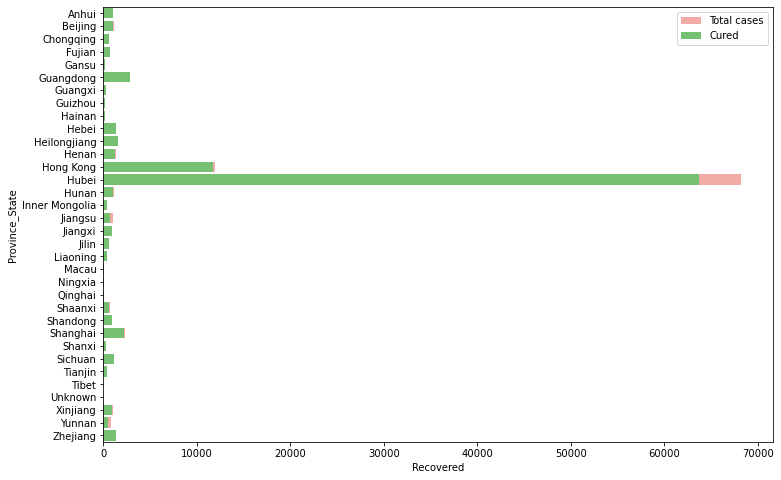

In [17]:
import matplotlib.pyplot as plt
compare_China = latest_data[latest_data['Country_Region'] == 'China']
f, ax = plt.subplots(figsize = (12, 8))
compare = compare_China[['Province_State', 'Confirmed', 'Recovered', 'Deaths']]
sns.set_color_codes('pastel')
sns.barplot(x = 'Confirmed', y = 'Province_State', data = compare, label = 'Total cases', color = 'r')
sns.set_color_codes('muted')
sns.barplot(x = 'Recovered', y = 'Province_State', data = compare, label = 'Cured', color = 'g')

ax.legend()

The bar graph indicates the ratio of total confirmed cases and cured cases in China as of Aug 24, 2021. The green part indicates the cure portion whereas the red part shows the total confirmed cases. We can say that almost every confirmed COVID cases in China from every province was cureved, except for Hubei, that there still was a small portion of confirmed cases that was not cured. We are glad to see graph like this as this shows China has almost successfully controlled the spreading of COVID issue and fully contribute to the cure of it.

### Prediction of COVID-19 trends

In [18]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
def model_fit(country_name, method):
    country = confirmed_df[confirmed_df['Country/Region'] == country_name]
    cols = country.keys()
    confirmed = country.loc[:, cols[-34]:cols[-4]]
    dates = confirmed.keys()
    world_cases = []
    for i in dates:
        confirmed_sum = confirmed[i].sum()
        world_cases.append(confirmed_sum)
    day_since = np.array([i for i in range(len(dates))]).reshape(-1, 1)
    world_cases = np.array(world_cases).reshape(-1, 1)
    future_forecast = np.array([i for i in range(len(dates) + 10)]).reshape(-1, 1)
    adjusted_dates = future_forecast[: -10]
    X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(day_since, world_cases, test_size = 0.15, shuffle = False)
    
    if method == 'svm':
        kernel = ['poly', 'sigmoid', 'rbf']
        c = [0.01, 0.1, 1, 10]
        gamma = [0.01, 0.1, 1]
        epsilon = [0.01, 0.1, 1]
        shrinking = [True, False]
        svm_grid = {'kernel': kernel, 'C': c, 'gamma': gamma, 'epsilon': epsilon, 'shrinking': shrinking}

        svm = SVR()
        svm_search = RandomizedSearchCV(svm, svm_grid, scoring = 'neg_mean_squared_error', cv = 3, return_train_score = True, n_jobs = -1, n_iter = 40, verbose = 1)
        svm_search.fit(X_train_confirmed, y_train_confirmed)
    
        svm_confirmed = svm_search.best_estimator_
        svm_pred = svm_confirmed.predict(future_forecast)
    
        svm_test_pred = svm_confirmed.predict(X_test_confirmed)

        plt.figure(figsize = (20, 12))
        plt.plot(adjusted_dates, world_cases)
        plt.plot(future_forecast, svm_pred, linestyle = 'dashed', color = 'red')
    
    if method == 'linear':
        linear_model = LinearRegression(normalize = True, fit_intercept = True)
        linear_model.fit(X_train_confirmed, y_train_confirmed)
        test_linear_pred = linear_model.predict(X_test_confirmed)
        linear_pred = linear_model.predict(future_forecast)
        plt.figure(figsize = (20, 12))
        plt.plot(adjusted_dates, world_cases)
        plt.plot(future_forecast, linear_pred, linestyle = 'dashed', color = 'red')
    
    plt.title('Confirmed cases Over time in ' + country_name, size = 30)
    plt.xlabel('Days Since 07/25/2021', size = 30)
    plt.ylabel('Number of Confirmed Cases', size = 30)
    plt.legend(['Confirmed Cases', method + ' predictions'])
    plt.show()


Fitting 3 folds for each of 40 candidates, totalling 120 fits


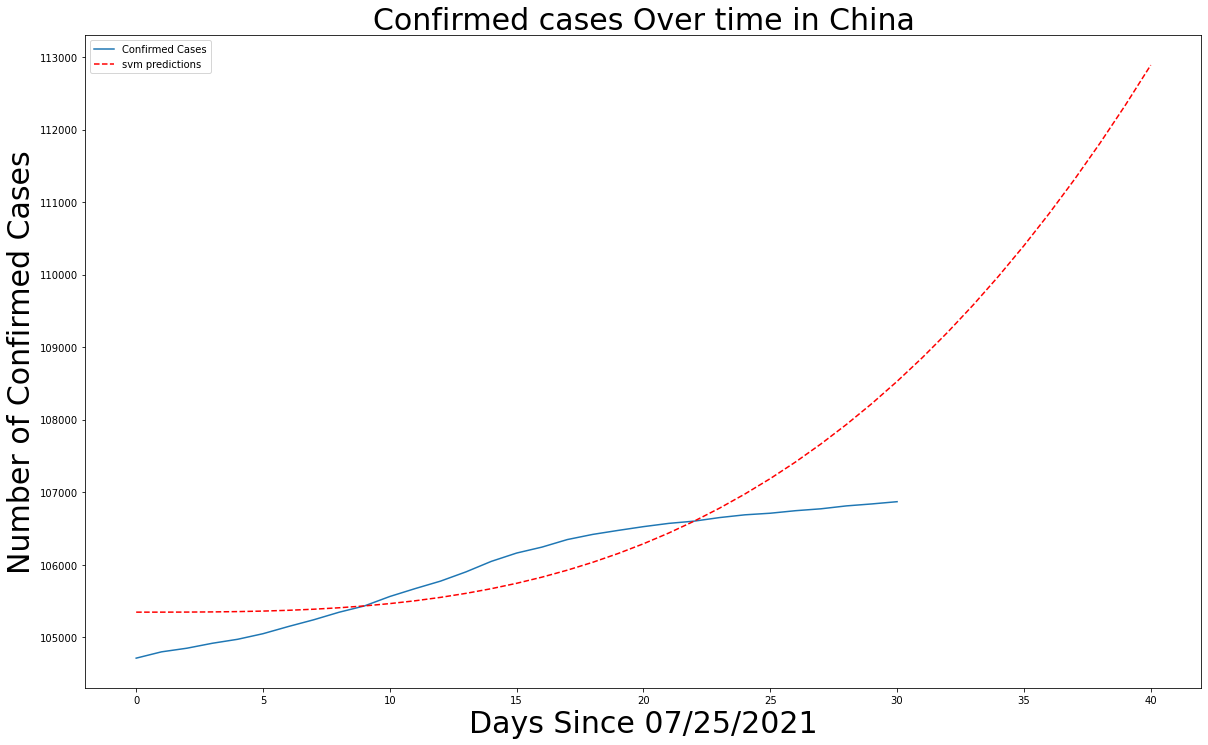

In [19]:
model_fit('China', 'svm')

We are going to take a look at the prediciton of confirmed COVID cases 10 days after Aug 24, 2021 in China. First we use SVM model. SVM is a predictive analysis data-classification algorithm that assigns new data elements to one of labeled categories. From our model where red dashed line indicates the svm model, we can see prediction is not really accurate as trend of confirmed cases in China tends to decline whereas our predicted model tends to keep going up. One possible reason to cause this is our model doesn't involve external intervention like area locked down, so we will take a look at linear regression prediction.

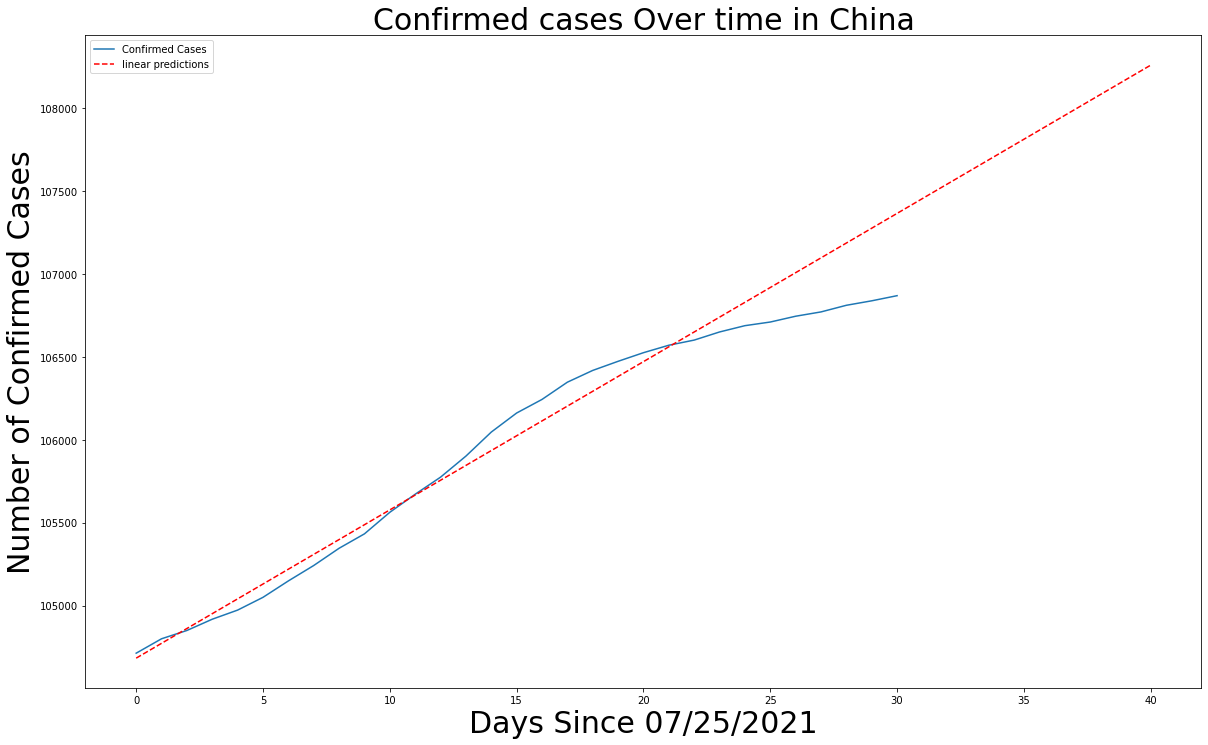

In [20]:
model_fit('China', 'linear')

Linear regression is one of the most commonly used predictive modelling techniques based on dependent (target) and independent variable (predictor). We are able to see that the linear regression model fits more appropriate than our svm model. Our confirmed cases data lies on the predicted regression line which provides a better accuracy. From our linear model, China may has around 2k confirmed cases increase 10 days after Aug 24, 2021.

Fitting 3 folds for each of 40 candidates, totalling 120 fits


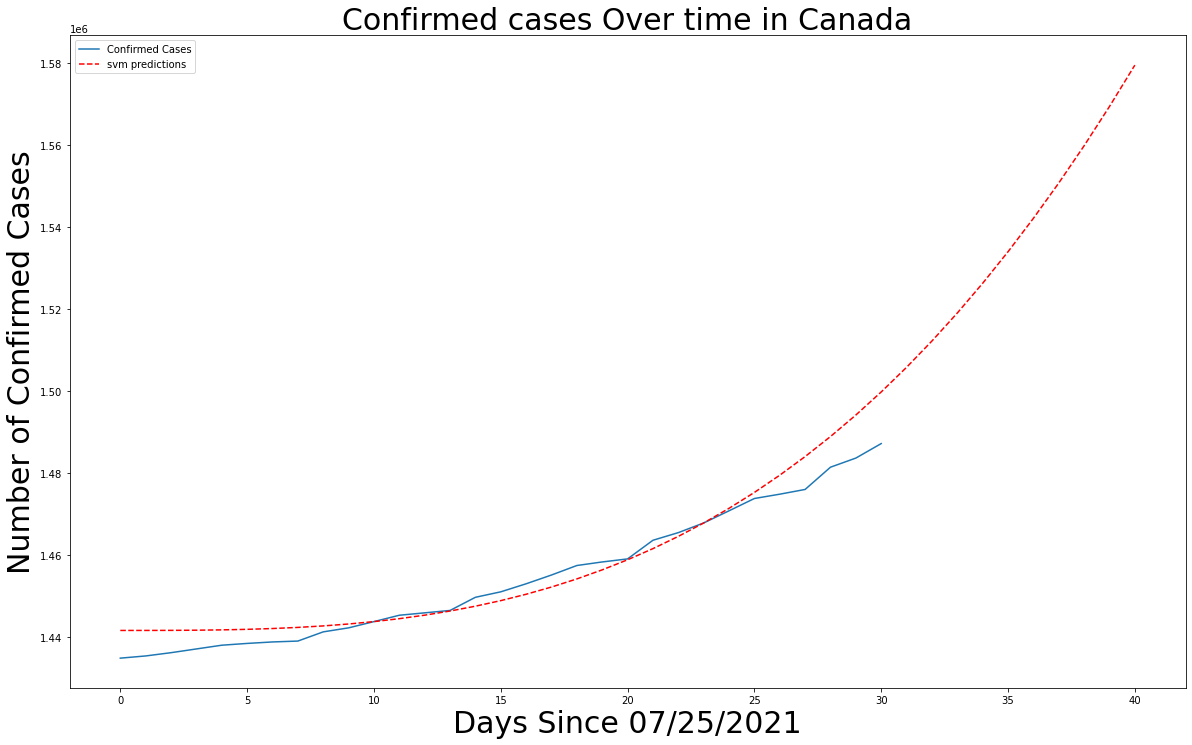

In [21]:
model_fit('Canada', 'svm')

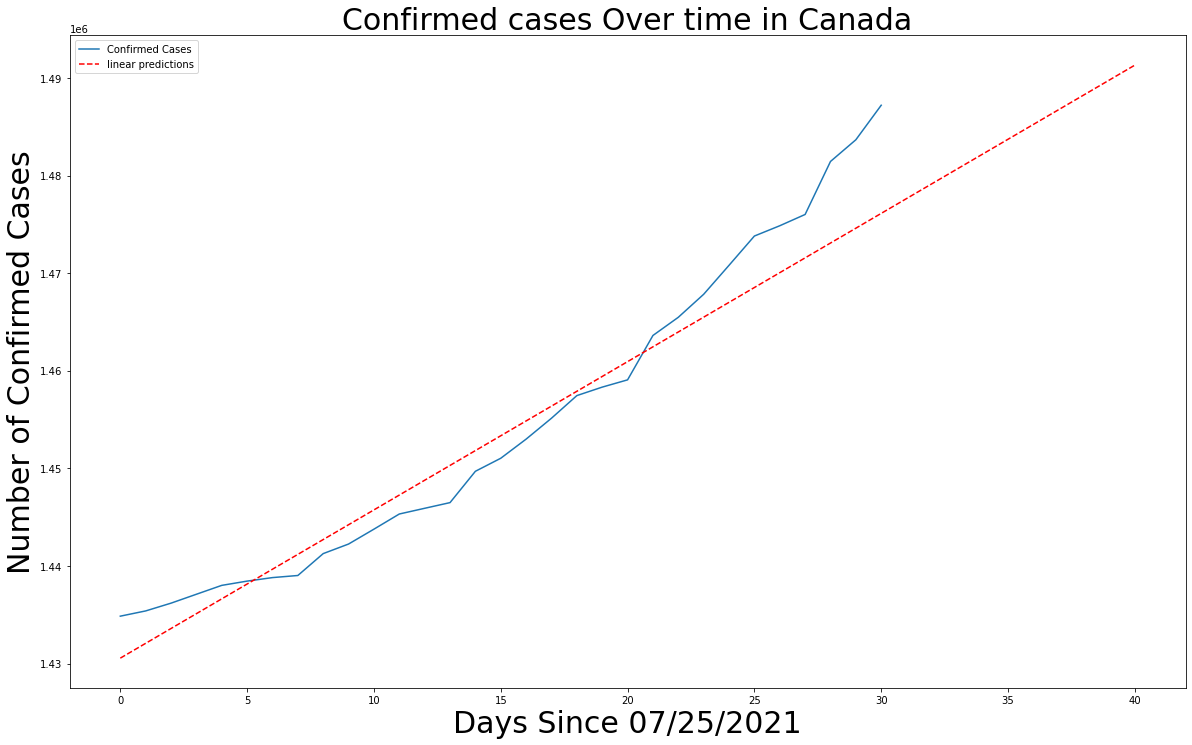

In [22]:
model_fit('Canada', 'linear')

## What you can do with the data: <br>
1. visualize the trend (using time series models such as moving average etc.)
- worldwide
- certain country (especially with large number of cases)
- categorize (confirmed, death, recovered etc. can make them on same or different graphs)
- trendlines or bar graph
2. predict the future cases
- worldwide
- certain country (especially with large number of cases)
- categorize (confirmed, death, recovered etc. can make them on same or different graphs)
- trendlines or bar graph
3. color-code or highlight countries that has large amount of cases (confirmed, death, recovered etc.)
